In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from sklearn import linear_model
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [2]:
geoData = pd.read_csv('data/geoData.csv',encoding='latin1')
InfantData = pd.read_csv('data/InfantData.csv',encoding='latin1')
pertusisRates2010_2015 = pd.read_csv('data/pertusisRates2010_2015.csv',encoding='latin1')
StudentData = pd.read_csv('data/StudentData.csv',encoding='latin1')

In [3]:
geoData.head()

,longitude,latitude,school_code,countyMatch,isSchool
0,-122.215864,37.803399,7092463,1,1
1,-121.882682,37.716306,6972533,1,1
2,-122.196244,37.758459,7082266,1,1
3,-122.234422,37.782892,6910343,1,1
4,-122.243885,37.768844,6967434,1,1


In [4]:
InfantData

,COUNTY,Cases,Hospitalizations,Deaths,Case_Rate
0,ALAMEDA,10,3,0,1.0
1,ALPINE,0,0,0,0.0
2,AMADOR,0,0,0,0.0
3,BUTTE,6,5,0,5.1
4,CALAVERAS,0,0,0,0.0
5,COLUSA,1,1,0,NaN
6,CONTRA COSTA,8,5,0,1.3
7,DEL NORTE,0,0,0,0.0
8,EL DORADO,3,3,0,3.8
9,FRESNO,32,11,0,4.0


In [5]:
pertusisRates2010_2015

,county,Cases2010,Rate2010,Cases2011,Rate2011,Cases2012,Rate2012,Cases2013,Rate2013,Cases2014,Rate2014
0,CALIFORNIA,9159,24.55,3016,8.03,1023,2.70,2537,6.64,10831,28.35
1,ALAMEDA,423,30.21,206,14.59,62,4.35,124,8.55,354,24.41
2,ALPINE,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
3,AMADOR,4,10.56,11,29.48,1,2.74,2,5.52,1,2.76
4,BUTTE,32,14.55,16,7.26,3,1.36,33,14.87,30,13.52
5,CALAVERAS,9,19.80,5,11.08,0,0.00,2,4.39,17,37.35
6,COLUSA,11,51.20,1,4.65,0,0.00,0,0.00,0,0.00
7,CONTRA COSTA,205,19.48,114,10.74,24,2.24,69,6.37,463,42.78
8,DEL NORTE,16,56.06,0,0.00,0,0.00,0,0.00,2,7.16
9,EL DORADO,54,29.85,11,6.09,3,1.64,4,2.18,33,18.00


# EDA Exploratory data analysis

In [6]:
print(f"la table fait {StudentData.shape[0]} lignes et {StudentData.shape[1]} colonnes" )
StudentData.head()

la table fait 116144 lignes et 11 colonnes


,schoolType,COUNTY,SCHOOL,school_code,n,nMMR,nDTP,nPolio,nPBE,nPME,year
0,PRIVATE,ALAMEDA,A CHILD'S WORLD MONTE,7092463,12,12,11,9,0,0,2000
1,PRIVATE,ALAMEDA,ACAD,6972533,15,15,15,15,0,0,2000
2,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,19,17,17,17,0,0,2009
3,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,23,6,22,23,0,0,2010
4,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,27,27,27,27,0,0,2006


In [7]:
# prendre une vue globale sur notre DF
StudentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116144 entries, 0 to 116143
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   schoolType   116144 non-null  object
 1   COUNTY       116144 non-null  object
 2   SCHOOL       116144 non-null  object
 3   school_code  116144 non-null  int64 
 4   n            116144 non-null  int64 
 5   nMMR         116144 non-null  int64 
 6   nDTP         116144 non-null  int64 
 7   nPolio       116144 non-null  int64 
 8   nPBE         116144 non-null  int64 
 9   nPME         116144 non-null  int64 
 10  year         116144 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 9.7+ MB


In [8]:
# decribtion des valeurs contunue 
StudentData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_code,116144.0,5.913840e+06,1.549955e+06,1001.0,6020200.0,6048680.0,6132765.0,9999999.0
n,116144.0,7.073894e+01,4.442241e+01,10.0,33.0,67.0,98.0,981.0
nMMR,116144.0,6.674725e+01,4.325178e+01,0.0,30.0,63.0,94.0,980.0
nDTP,116144.0,6.655491e+01,4.304114e+01,0.0,30.0,63.0,93.0,974.0
nPolio,116144.0,6.682762e+01,4.325064e+01,0.0,30.0,63.0,94.0,978.0
nPBE,116144.0,1.265782e+00,3.391348e+00,0.0,0.0,0.0,1.0,138.0
nPME,116144.0,1.148832e-01,5.567902e-01,0.0,0.0,0.0,0.0,37.0
year,116144.0,2.007416e+03,4.609974e+00,2000.0,2003.0,2007.0,2011.0,2015.0


In [9]:
StudentData.describe(include="O").transpose()

,count,unique,top,freq
schoolType,116144,2,PUBLIC,86710
COUNTY,116144,58,LOS ANGELES,29112
SCHOOL,116144,22945,LINCOLN ELEM,286


In [10]:
# chercher les valeur manquantes 
count = StudentData.isnull().sum().sort_values(ascending=False)
percentage = ((StudentData.isnull().sum()/len(StudentData)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
print('count and percentage of missing values for the columns :')
missing_data

count and percentage of missing values for the columns :


,Count,Percentage
year,0,0.0
nPME,0,0.0
nPBE,0,0.0
nPolio,0,0.0
nDTP,0,0.0
nMMR,0,0.0
n,0,0.0
school_code,0,0.0
SCHOOL,0,0.0
COUNTY,0,0.0


In [11]:
#Removing colimns
StudentData.drop(columns=['school_code','SCHOOL'],inplace = True)
StudentData

,schoolType,COUNTY,n,nMMR,nDTP,nPolio,nPBE,nPME,year
0,PRIVATE,ALAMEDA,12,12,11,9,0,0,2000
1,PRIVATE,ALAMEDA,15,15,15,15,0,0,2000
2,PRIVATE,ALAMEDA,19,17,17,17,0,0,2009
3,PRIVATE,ALAMEDA,23,6,22,23,0,0,2010
4,PRIVATE,ALAMEDA,27,27,27,27,0,0,2006
...,...,...,...,...,...,...,...,...,...
116139,PUBLIC,YUBA,97,86,88,86,2,0,2015
116140,PUBLIC,YUBA,24,21,22,23,0,0,2015
116141,PUBLIC,YUBA,84,83,83,83,1,0,2015
116142,PUBLIC,YUBA,15,12,14,14,0,1,2015


In [12]:

StudentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116144 entries, 0 to 116143
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   schoolType  116144 non-null  object
 1   COUNTY      116144 non-null  object
 2   n           116144 non-null  int64 
 3   nMMR        116144 non-null  int64 
 4   nDTP        116144 non-null  int64 
 5   nPolio      116144 non-null  int64 
 6   nPBE        116144 non-null  int64 
 7   nPME        116144 non-null  int64 
 8   year        116144 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 8.0+ MB


In [13]:
col_object_l = StudentData.select_dtypes(include='object').columns # Stock les colonnes

for col in col_object_l:
    print(f"La colonne {col} a {StudentData[col].nunique()} modalités")
    print(f"chaque modalite a {StudentData[col].value_counts(dropna=False)}")
    print("")

La colonne schoolType a 2 modalités
chaque modalite a PUBLIC     86710
PRIVATE    29434
Name: schoolType, dtype: int64

La colonne COUNTY a 58 modalités
chaque modalite a LOS ANGELES        29112
ORANGE              9321
SAN DIEGO           9021
SAN BERNARDINO      6175
SANTA CLARA         5647
RIVERSIDE           5513
ALAMEDA             4817
SACRAMENTO          4528
CONTRA COSTA        3227
FRESNO              3143
VENTURA             2869
SAN JOAQUIN         2542
SAN MATEO           2506
KERN                2485
SAN FRANCISCO       2129
SONOMA              1809
STANISLAUS          1766
TULARE              1624
SANTA BARBARA       1476
MONTEREY            1293
PLACER              1257
SOLANO              1178
MARIN                978
MERCED               895
SANTA CRUZ           875
SAN LUIS OBISPO      799
BUTTE                759
SHASTA               713
IMPERIAL             642
YOLO                 619
HUMBOLDT             582
EL DORADO            579
KINGS                533
NAPA

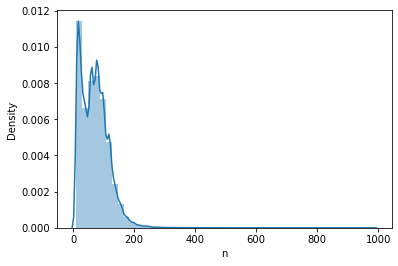

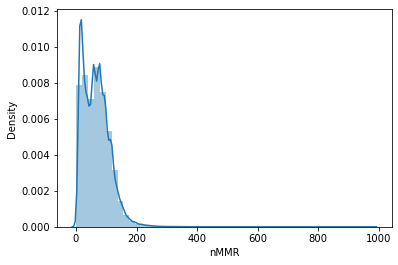

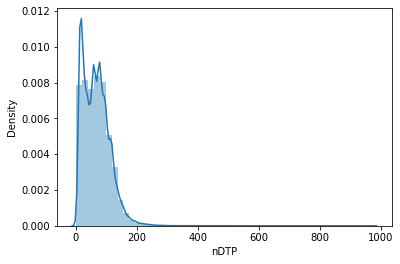

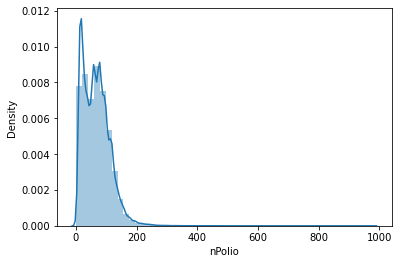

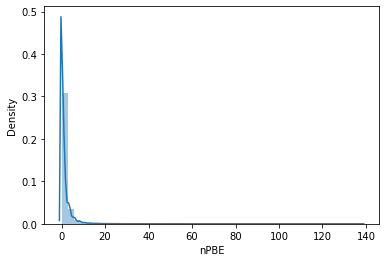

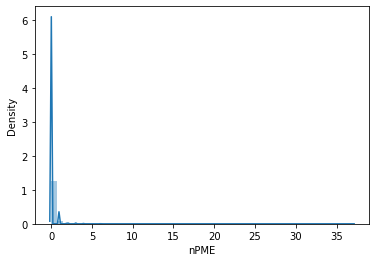

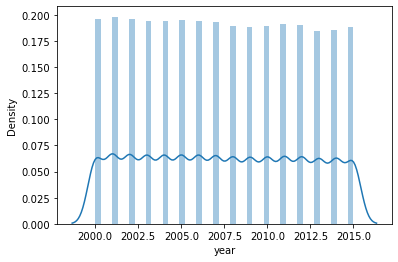

In [14]:
# nous visualisons la distrubition de nos données conti un par un on utilison un boucle for 
for i  in StudentData.describe().columns:
    sns.distplot(StudentData[i])
    plt.show()

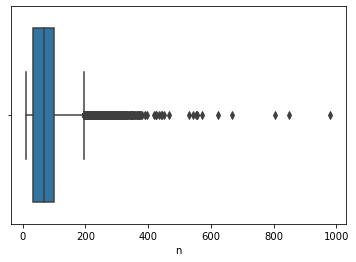

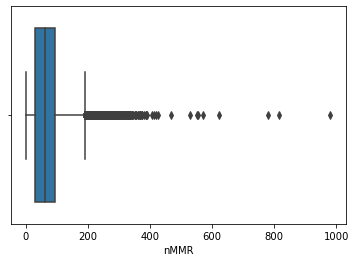

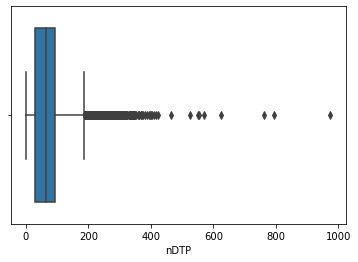

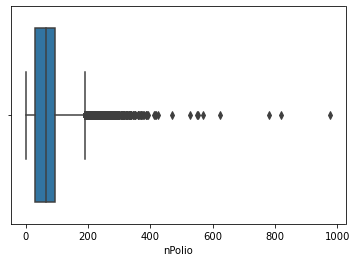

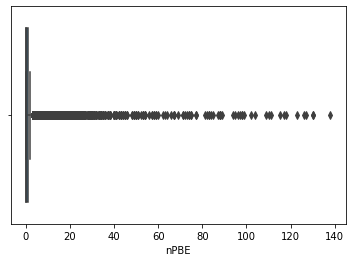

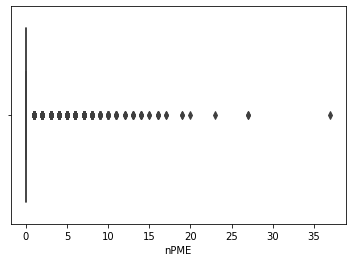

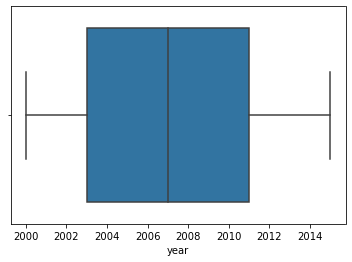

In [15]:
for i  in StudentData.describe().columns:
    sns.boxplot(StudentData[i])
    plt.show()

In [16]:
#distipition des valeurs categorie

for i in ['schoolType','COUNTY']:
    temp =StudentData[i].value_counts()
    proprotion = (StudentData[i].value_counts() / sum(StudentData[i].value_counts())).sort_values(ascending=False)
    proprotion = pd.concat([temp,proprotion],axis=1,keys=['Count','Proprotion'])
    print(proprotion)
    

         Count  Proprotion
PUBLIC   86710    0.746573
PRIVATE  29434    0.253427
                 Count  Proprotion
LOS ANGELES      29112    0.250654
ORANGE            9321    0.080254
SAN DIEGO         9021    0.077671
SAN BERNARDINO    6175    0.053167
SANTA CLARA       5647    0.048621
RIVERSIDE         5513    0.047467
ALAMEDA           4817    0.041474
SACRAMENTO        4528    0.038986
CONTRA COSTA      3227    0.027784
FRESNO            3143    0.027061
VENTURA           2869    0.024702
SAN JOAQUIN       2542    0.021887
SAN MATEO         2506    0.021577
KERN              2485    0.021396
SAN FRANCISCO     2129    0.018331
SONOMA            1809    0.015575
STANISLAUS        1766    0.015205
TULARE            1624    0.013983
SANTA BARBARA     1476    0.012708
MONTEREY          1293    0.011133
PLACER            1257    0.010823
SOLANO            1178    0.010143
MARIN              978    0.008421
MERCED             895    0.007706
SANTA CRUZ         875    0.007534
SAN LUIS 

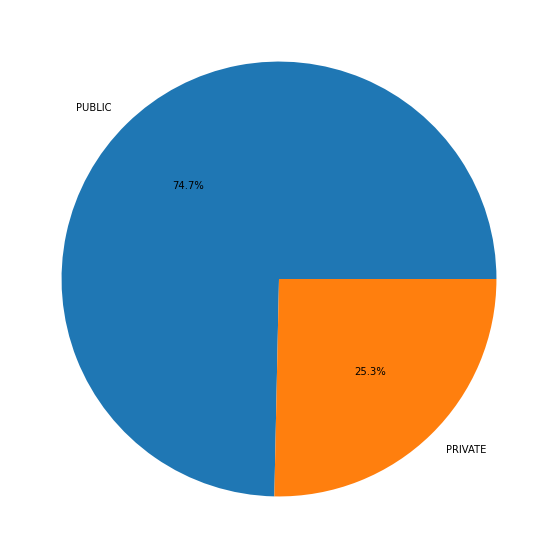

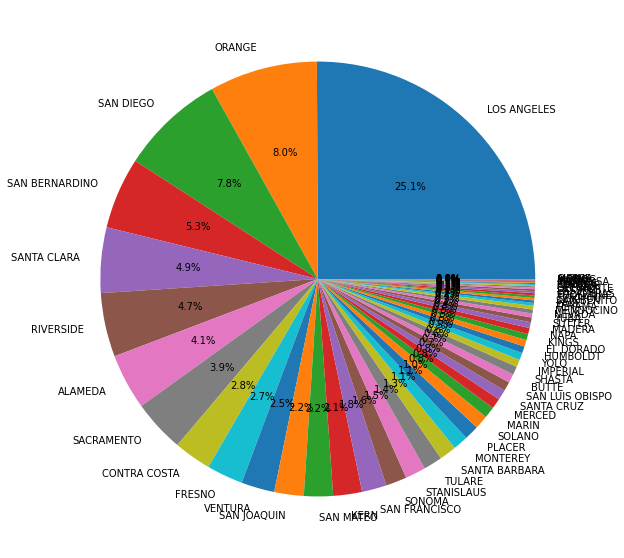

In [17]:
for i in ['schoolType','COUNTY']:
    plt.figure(figsize=(13,10))
    proposition_values = StudentData[i].value_counts().values
    proposition_keys = StudentData[i].value_counts().keys()
    plt.pie(proposition_values, labels = proposition_keys, autopct='%1.1f%%')


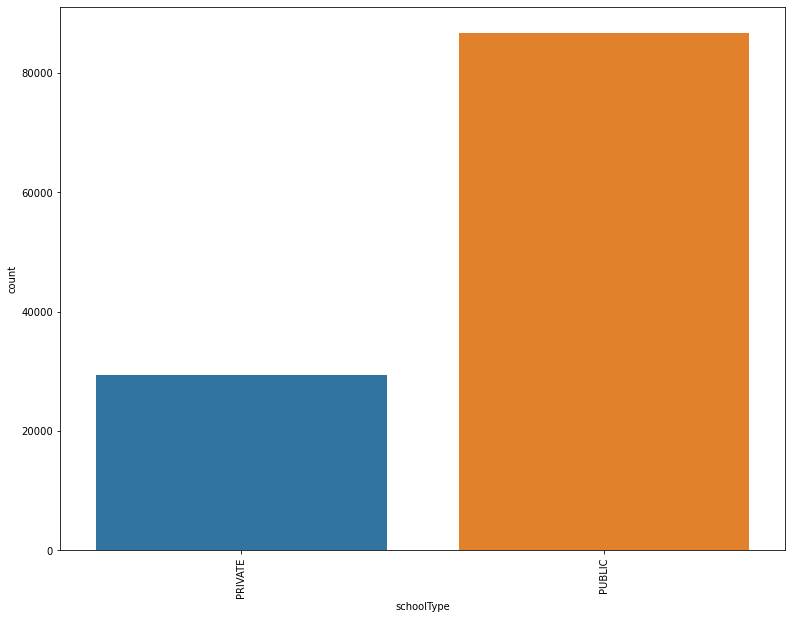

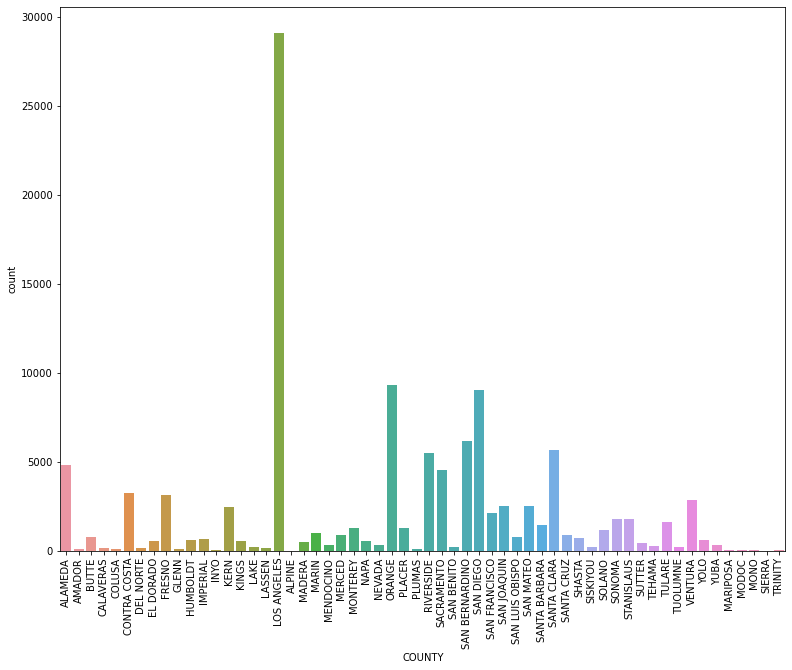

In [18]:
for i in ['schoolType','COUNTY']:
    plt.figure(figsize=(13,10))
    sns.countplot(StudentData[i])
    plt.xticks(rotation=90)
    plt.show()

In [19]:
StudentData.corr()

,n,nMMR,nDTP,nPolio,nPBE,nPME,year
n,1.000000,0.988983,0.987900,0.988784,0.100838,0.081861,0.050716
nMMR,0.988983,1.000000,0.998315,0.998507,0.023155,0.066897,0.032946
nDTP,0.987900,0.998315,1.000000,0.999404,0.024652,0.067418,0.033024
nPolio,0.988784,0.998507,0.999404,1.000000,0.023432,0.067248,0.032010
nPBE,0.100838,0.023155,0.024652,0.023432,1.000000,0.054611,0.146251
nPME,0.081861,0.066897,0.067418,0.067248,0.054611,1.000000,0.030550
year,0.050716,0.032946,0.033024,0.032010,0.146251,0.030550,1.000000


<AxesSubplot:>

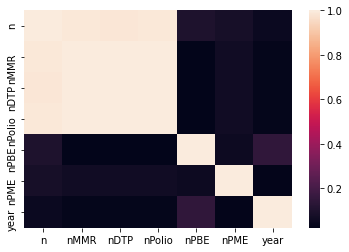

In [20]:
# voir la correlation entre les variables 
sns.heatmap(StudentData.corr())

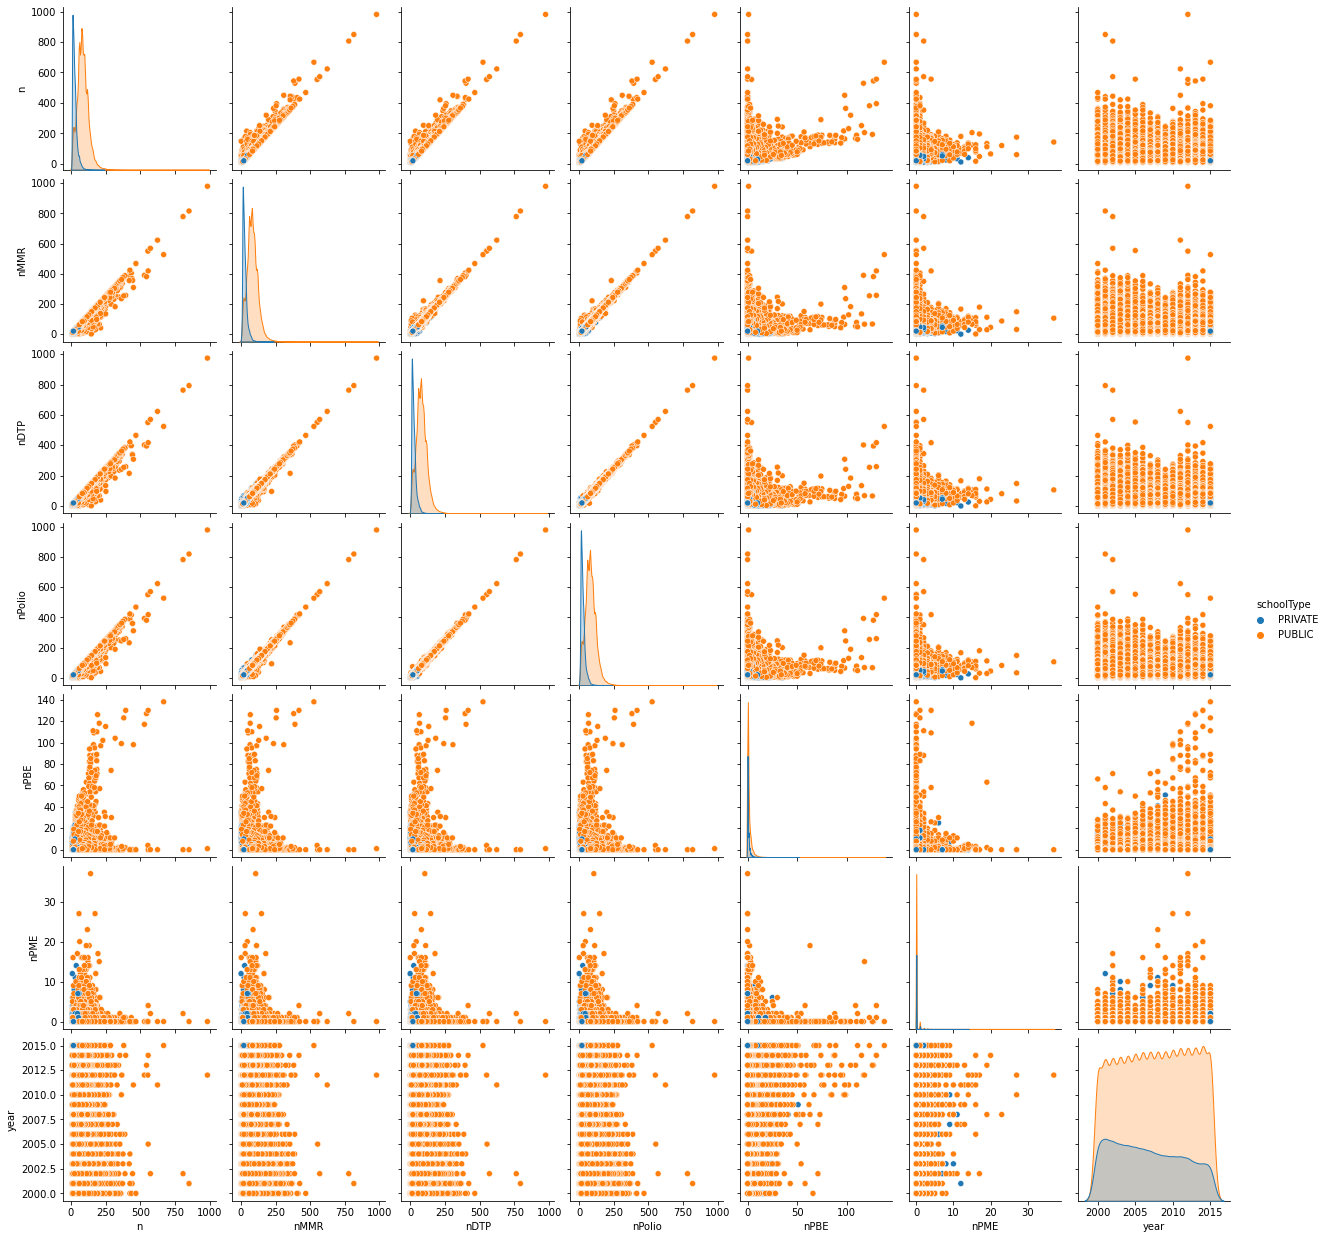

In [21]:
#relation entre les variable conti et schoolType
sns.pairplot(StudentData, hue="schoolType")

In [22]:
# grouper notre data par region "COUNTY"

StudentData.groupby(['COUNTY']).sum()

,n,nMMR,nDTP,nPolio,nPBE,nPME,year
COUNTY,,,,,,,
ALAMEDA,301735,284257,282686,283916,3232,462,9669472
ALPINE,205,188,186,188,4,0,30092
AMADOR,4937,4647,4643,4669,174,9,210754
BUTTE,40388,37190,37184,37346,1730,105,1523658
CALAVERAS,6733,5887,5849,5858,420,16,353279
COLUSA,5862,5742,5742,5755,45,4,176638
CONTRA COSTA,224608,215429,214877,215461,3688,440,6478119
DEL NORTE,5134,4772,4756,4774,256,13,273019
EL DORADO,34851,31403,31386,31427,2014,101,1162359


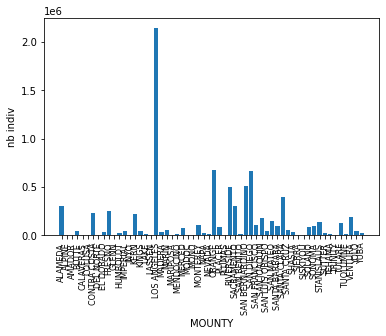

In [23]:
keys = [city for city, df in StudentData.groupby(['COUNTY'])]

plt.bar(keys,StudentData.groupby(['COUNTY']).sum()['n'])
plt.ylabel('nb indiv')
plt.xlabel('MOUNTY')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [24]:
df_schoolType = StudentData.groupby(["schoolType"]).sum()
df_schoolType

,n,nMMR,nDTP,nPolio,nPBE,nPME,year
schoolType,,,,,,,
PRIVATE,804873,733623,738217,738486,24256,1767,59066389
PUBLIC,7411030,7018670,6991737,7023141,122757,11576,174082970


Text(0.5, 1.0, 'nb individue and schoolType')

<Figure size 936x720 with 0 Axes>

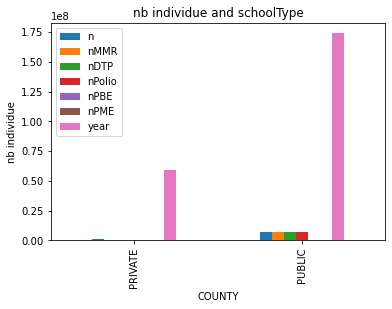

In [25]:
plt.figure(figsize=(13,10))
df_schoolType.plot(kind='bar')
plt.ylabel('nb individue')
plt.xlabel('COUNTY')
plt.title('nb individue and schoolType')



In [26]:
df_schoolType = StudentData.groupby(["year","schoolType","COUNTY"]).sum()
df_schoolType

n   nMMR   nDTP  nPolio  nPBE  nPME
year schoolType COUNTY                                            
2000 PRIVATE    ALAMEDA     3297   3056   3094    3092    12     2
                AMADOR        17     17     17      17     0     0
                BUTTE        248    233    231     234     3     0
                CALAVERAS     11     10     10      10     1     0
                COLUSA        11     11     11      11     0     0
...                          ...    ...    ...     ...   ...   ...
2015 PUBLIC     TULARE      9035   8867   8812    8856    81     7
                TUOLUMNE     501    426    423     428    28     0
                VENTURA    11652  11163  11117   11156   261    15
                YOLO        2465   2318   2306    2315    82     0
                YUBA        1365   1312   1310    1320    25     2

[1653 rows x 6 columns]

In [27]:
StudentData.head()

,schoolType,COUNTY,n,nMMR,nDTP,nPolio,nPBE,nPME,year
0,PRIVATE,ALAMEDA,12,12,11,9,0,0,2000
1,PRIVATE,ALAMEDA,15,15,15,15,0,0,2000
2,PRIVATE,ALAMEDA,19,17,17,17,0,0,2009
3,PRIVATE,ALAMEDA,23,6,22,23,0,0,2010
4,PRIVATE,ALAMEDA,27,27,27,27,0,0,2006


In [28]:
predict_categorie = StudentData.drop(['n','nMMR','nDTP','nPolio','nPBE','nPME','year'],axis='columns')
predict_cont = StudentData.drop(['schoolType','nMMR','nDTP','nPolio','nPBE','nPME','COUNTY'],axis='columns')
predict_cont

,n,year
0,12,2000
1,15,2000
2,19,2009
3,23,2010
4,27,2006
...,...,...
116139,97,2015
116140,24,2015
116141,84,2015
116142,15,2015


In [29]:
# on va predire le nb d individue dans une jardin d enfant
# one hot encoder 
le = LabelEncoder()
for i in predict_categorie:
    predict_categorie[i]=le.fit_transform(predict_categorie[i])
predict_categorie


,schoolType,COUNTY
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
116139,1,57
116140,1,57
116141,1,57
116142,1,57


In [30]:
predict_test = pd.concat([predict_categorie,predict_cont],axis=1)
predict_test

,schoolType,COUNTY,n,year
0,0,0,12,2000
1,0,0,15,2000
2,0,0,19,2009
3,0,0,23,2010
4,0,0,27,2006
...,...,...,...,...
116139,1,57,97,2015
116140,1,57,24,2015
116141,1,57,84,2015
116142,1,57,15,2015


In [31]:
reg = linear_model.LinearRegression()
reg.fit(predict_test.drop('n',axis='columns'),predict_test.n)

LinearRegression()

In [32]:
reg.coef_

array([ 5.82598126e+01, -1.35484752e-01,  2.34172263e-02])

In [33]:

reg.intercept_

-16.023537786058327

In [34]:
reg.predict([[0, 6, 2020]])

array([30.46635073])

In [35]:
#regression logistique
from sklearn.model_selection import train_test_split
X=predict_test.drop(['n'],axis='columns')
y=predict_test.drop(['schoolType','year','COUNTY'],axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [36]:
model.predict(X_test)

array([60, 80, 60, ..., 60, 60, 60], dtype=int64)

In [37]:
model.predict([[0, 3, 2020]])

array([60], dtype=int64)

In [38]:
StudentData

,schoolType,COUNTY,n,nMMR,nDTP,nPolio,nPBE,nPME,year
0,PRIVATE,ALAMEDA,12,12,11,9,0,0,2000
1,PRIVATE,ALAMEDA,15,15,15,15,0,0,2000
2,PRIVATE,ALAMEDA,19,17,17,17,0,0,2009
3,PRIVATE,ALAMEDA,23,6,22,23,0,0,2010
4,PRIVATE,ALAMEDA,27,27,27,27,0,0,2006
...,...,...,...,...,...,...,...,...,...
116139,PUBLIC,YUBA,97,86,88,86,2,0,2015
116140,PUBLIC,YUBA,24,21,22,23,0,0,2015
116141,PUBLIC,YUBA,84,83,83,83,1,0,2015
116142,PUBLIC,YUBA,15,12,14,14,0,1,2015


In [39]:
# KMEANS
df_kmeans = StudentData.drop(['schoolType','COUNTY','n','nPBE','nPME','year'],axis='columns')

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
km = KMeans(n_clusters=3)
yp = km.fit_predict(df_kmeans)
yp

array([0, 0, 0, ..., 2, 0, 0])

In [41]:

df_kmeans['cluster'] = yp
df_kmeans.head(2)

,nMMR,nDTP,nPolio,cluster
0,12,11,9,0
1,15,15,15,0


In [42]:
df_kmeans.cluster.unique()

array([0, 2, 1])

In [43]:
df1 = df_kmeans[df_kmeans.cluster==0]
df2 = df_kmeans[df_kmeans.cluster==1]
df3 = df_kmeans[df_kmeans.cluster==2]

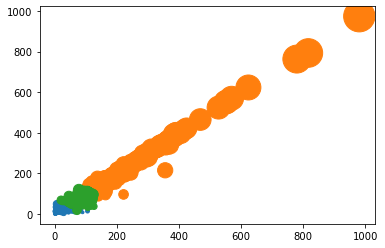

In [44]:
plt.scatter(df1['nMMR'],df1['nDTP'],df1['nPolio'])
plt.scatter(df2['nMMR'],df2['nDTP'],df2['nPolio'])
plt.scatter(df3['nMMR'],df3['nDTP'],df3['nPolio'])

In [45]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_kmeans)
    sse.append(km.inertia_)

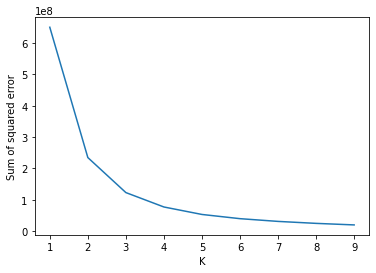

In [46]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [47]:
#CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [48]:
df_kmeans

,nMMR,nDTP,nPolio,cluster
0,12,11,9,0
1,15,15,15,0
2,17,17,17,0
3,6,22,23,0
4,27,27,27,0
...,...,...,...,...
116139,86,88,86,2
116140,21,22,23,0
116141,83,83,83,2
116142,12,14,14,0


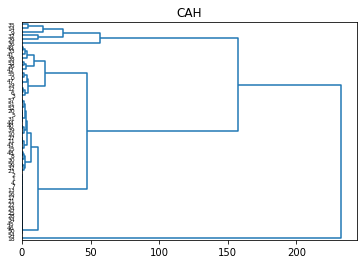

In [49]:
#générer la matrice des liens
data =InfantData.drop(['COUNTY','Case_Rate'],axis='columns')
Z = linkage(data,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=InfantData.index,orientation='right',color_threshold=0)
plt.show()


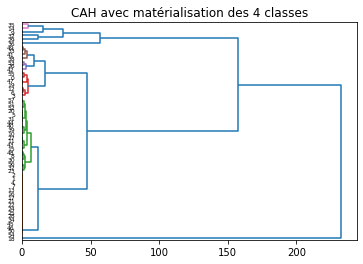

NameError: name 'fcluster' is not defined

In [50]:
#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=InfantData.index,orientation='right',color_threshold=7)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z,t=4,criterion='distance')
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(InfantData.index[idg],groupes_cah[idg]))

In [51]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(data)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pd.DataFrame(InfantData.index[idk],kmeans.labels_[idk]))
#distances aux centres de classes des observations
print(kmeans.transform(data))
#correspondance avec les groupes de la CAH
pandas.crosstab(groupes_cah,kmeans.labels_)

    0
0   0
0  30
0  31
0  33
0  34
0  37
0  38
0  39
0  40
0  41
0  42
0  43
0  44
0  45
0  46
0  47
0  48
0  49
0  50
0  51
0  52
0  53
0  54
0  55
0  56
0  27
0  28
0  25
0   1
0   2
0   3
0   4
0   5
0   6
0   7
0   8
0  10
0  11
0  12
0  13
0  26
0  57
0  16
0  17
0  19
0  20
0  21
0  22
0  23
0  24
0  15
1  18
2   9
2  35
2  32
2  29
2  14
3  36
[[  6.22004548 165.20895859  35.88035674  76.84399781]
 [  4.38834744 175.07426995  45.83448483  87.2811549 ]
 [  4.38834744 175.07426995  45.83448483  87.2811549 ]
 [  3.60048269 167.29016708  38.107742    80.08120878]
 [  4.38834744 175.07426995  45.83448483  87.2811549 ]
 [  3.05549089 173.68074159  44.45672053  86.02325267]
 [  5.05874753 165.65627063  36.40054945  78.16009212]
 [  4.38834744 175.07426995  45.83448483  87.2811549 ]
 [  1.22183769 170.89470442  41.70851232  83.52245207]
 [ 29.52471124 142.90556322  15.02664301  53.45091206]
 [  3.54560555 174.25842878  44.99111023  86.33075929]
 [  1.40124073 172.04941151  42.76914776 

NameError: name 'pandas' is not defined

[0.83653421 0.81372663 0.79284238 0.66454602 0.66379889 0.5801138
 0.59467682 0.552862   0.54226279]


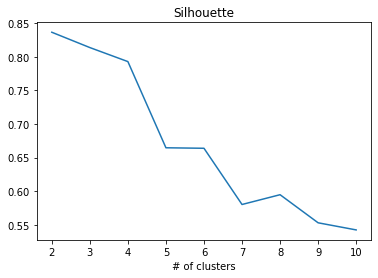

In [52]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(data)
    res[k] = metrics.silhouette_score(data,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()